# **Zomato Data Analysis Project**

**Step 1: Importing Libraries**

In [5]:
import pandas as pd                        #pandas is used for data manipulation and analysis
import numpy as np                         #numpy is used for numerical operations
import matplotlib.pyplot as plt            #matplotlib is used for data visualization
import seaborn as sns                      #seaborn is used for data visualization

**Step 2: Create the dataframe**

In [22]:
dataframe= pd.read_csv('Zomato data .csv')

In [23]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Step 3: rate column data correction**

In [24]:
def rate_correction(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(rate_correction)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Identifying popular restaurant type with maximum customers on Zomato**

In [26]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

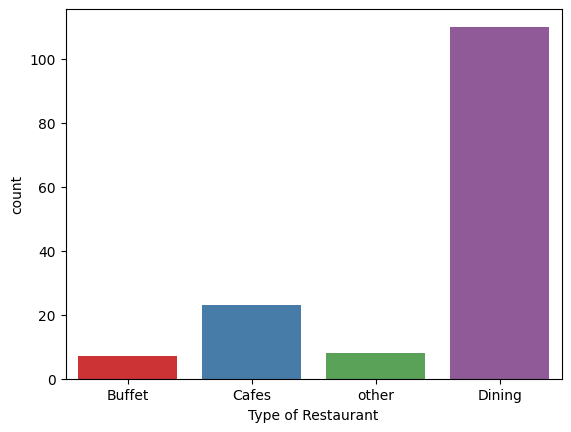

In [36]:
sns.countplot(x='listed_in(type)', hue='listed_in(type)', data=dataframe, palette="Set1", legend=False)
plt.xlabel("Type of Restaurant")

**Conclusion:Dining is the most popular restaurant type on Zomato**

**Identifying customer preferences through vote counts across restaurant categories**

Text(0, 0.5, 'Votes')

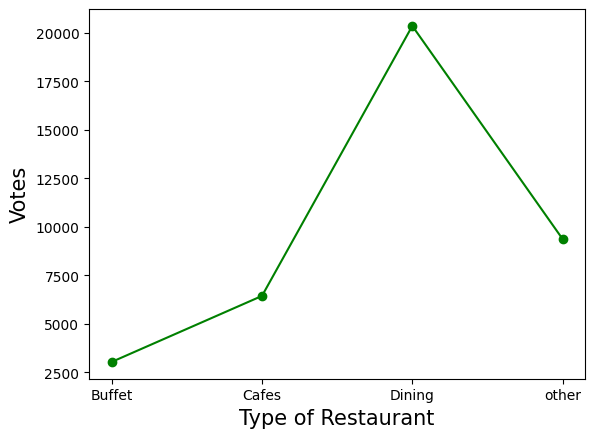

In [56]:
grouped_data= dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="black",size=15)
plt.ylabel("Votes",c="black",size=15)

**Conclusion:Dining Restaurant received ratings from 3.5 to 4**

**Identifying the most commonly received ratings among restaurants**

In [57]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<function matplotlib.pyplot.show(close=None, block=None)>

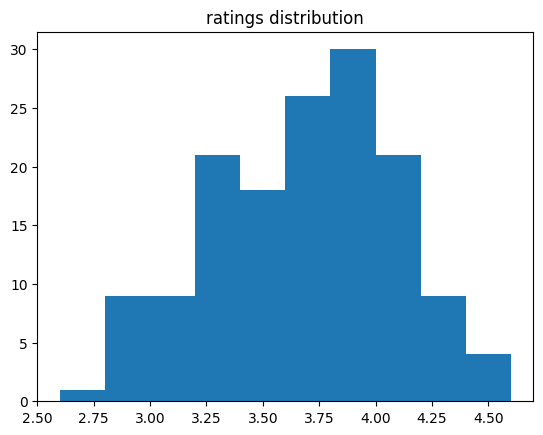

In [64]:
plt.hist(dataframe['rate'],bins=10)
plt.title("ratings distribution")
plt.show

**Conclusion:Majority Restaurant received ratings from 3.5 to 4**

**Identifying average order spending by couples**

In [65]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

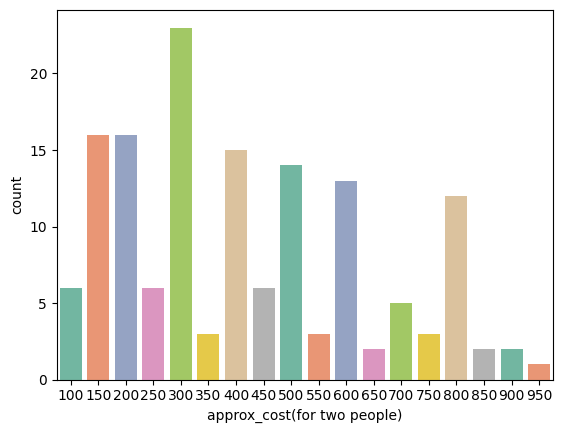

In [66]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='Set2', legend=False)

**Conclusion:Most couples prefer restaurants with an average cost of around ₹300**